## Bike Price Prediction Using Linear  Regression

### Import Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bike%20Prices.csv')

In [46]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


### Information of Dataframe

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


### Drop Missing Values Row

In [75]:
df = df.dropna()

### Summary Statistics

In [76]:
df.describe()

,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,0.004792,0.119808,32671.576677,8.795871e+04
std,59904.350888,3.018885,0.069116,0.353303,45479.661039,7.749659e+04
min,6000.000000,2001.000000,0.000000,0.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,0.000000,0.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,0.000000,0.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,0.000000,0.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,1.000000,3.000000,585659.000000,1.278000e+06


### Categories and Counts of Categorical variables

In [77]:
df[['Brand']].value_counts()

Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
UM            3
Activa        3
Harley        2
Vespa         2
BMW           1
Hyosung       1
Benelli       1
Yo            1
dtype: int64

In [78]:
df[['Model']].value_counts()

Model                                     
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Yamaha FZ S V 2.0                             16
Bajaj Discover 125                            16
                                              ..
Royal Enfield Thunderbird 500                  1
Royal Enfield Continental GT [2013 - 2018]     1
Royal Enfield Classic Stealth Black            1
Royal Enfield Classic Squadron Blue            1
Yo Style                                       1
Length: 183, dtype: int64

In [79]:
df[['Seller_Type']].value_counts()

Seller_Type
0              623
1                3
dtype: int64

In [80]:
df[['Owner']].value_counts()

Owner
0        556
1         66
2          3
3          1
dtype: int64

### Column Names

In [81]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

### Shape of DataFrame

In [82]:
df.shape

(626, 8)

### Encoding of Categorical Features

In [83]:
df.replace({'Seller_Type' : {'Individual':0, 'Dealer':1}}, inplace=True)

In [84]:
df.replace({'Owner' : {'1st owner':0, '2nd owner':1, '3rd owner':2, '4th owner':3}}, inplace=True)

### Defining Y and X

In [85]:
y = df['Selling_Price']

In [86]:
y.shape

(626,)

In [87]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64

In [88]:
x = df.drop(['Brand', 'Model', 'Selling_Price'], axis = 1)

In [89]:
x.shape

(626, 5)

In [90]:
x

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0
...,...,...,...,...,...
621,2014,0,3,6500,534000.0
622,2011,0,0,12000,589000.0
623,2017,0,1,13600,599000.0
624,2019,0,0,2800,752020.0


### Train Test Split

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=82529)

In [93]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((438, 5), (188, 5), (438,), (188,))

### Model train

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lr = LinearRegression()

In [96]:
lr.fit(x_train, y_train)

LinearRegression()

### Model Prediction

In [97]:
y_pred = lr.predict(x_test)

In [98]:
y_pred.shape

(188,)

In [99]:
y_pred

array([ 49999.8803707 ,  48293.45926665,  54282.05987784,  59163.04677892,
        19457.95993564,  68272.14646425,   2475.10772824,  55454.31227858,
        53073.30605174,  25177.40209541,  12475.73631765,  65775.46312146,
        38776.06222707,  30288.52563989,  50847.49905632,  53971.40594036,
        20955.84890671,  48746.12555029,  29534.56241339,  63529.54116163,
        60957.95205134, 145881.44835321, 133589.62498154,   2148.00205394,
        13249.3424275 ,  21622.24471747,  72399.59551846,  26060.60746874,
        66018.03575256,  74868.32620708,  30373.85415191,  67902.0347656 ,
        58221.6167548 ,  75079.79800045,  50029.31838228, 132500.09691074,
        32682.17565166,  46527.08692678,  51706.29727613,  69963.71825879,
        27958.69410606,  87080.6863062 , 117968.13186875,  22004.85635909,
       120319.89052546,  47199.39936226,  54022.33654582, 142180.40647513,
        51947.34476498,  68081.83002324,  52966.04889932,  68279.07487781,
        87855.77137653,  

### Model Evaluation

In [100]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [101]:
mean_squared_error(y_test, y_pred)

237922187.42604336

In [102]:
mean_absolute_error(y_test, y_pred)

11131.386782151141

In [103]:
r2_score(y_test, y_pred)

0.868788238999047

### Visualization of Actual vs Predicted Results

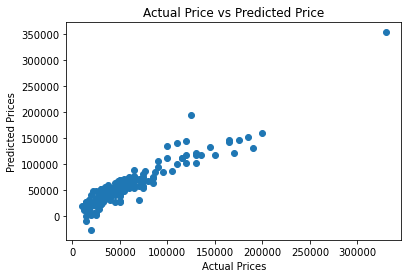

In [104]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.show()

### Future Predictions

In [106]:
df_new = df.sample()

In [107]:
df_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
132,Hero,Hero Maestro Edge,58000,2018,0,0,6000,54580.0


In [108]:
df_new.shape

(1, 8)

In [109]:
x_new = df_new.drop(['Brand', 'Model', 'Selling_Price'], axis=1)

In [110]:
y_pred_new = lr.predict(x_new)

In [111]:
y_pred_new

array([52012.51761797])